# Spring Bloom Time Series 2020 and 2021? #

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
s2001 = 262 - 365

In [3]:
year = 2020
# time series output files
#directory0 = '/ocean/sallen/allen/research/SOG-projects/SOG-bloomcast-ensemble/run/'
directory = '/data/dlatorne/SOG-projects/SOG-Bloomcast-Ensemble/run/'
data_bio_file = directory + '/timeseries/std_bio_'+str(year)+'_bloomcast.out_0910'
data_phys_file = directory + '/timeseries/std_phys_'+str(year)+'_bloomcast.out_0910'

In [4]:
# data files
wind_file0 = directory + 'Sandheads_wind'
cloud_file0 = directory + 'YVR_cloud_fraction' 
wind_file = directory + 'Sandheads_wind'
cloud_file = directory + 'YVR_cloud_fraction' 

In [5]:
# data
data_phys = np.loadtxt(data_phys_file, skiprows=9)
salinity = data_phys[:, 10]
temperature = data_phys[:, 8]
phys_time = data_phys[:, 0]/24 + s2001
data_bio = np.loadtxt(data_bio_file, skiprows=10)
phytoplankton = data_bio[:, 8]
nitrate = data_bio[:, 2]
bio_time = data_bio[:, 0]/24 + s2001

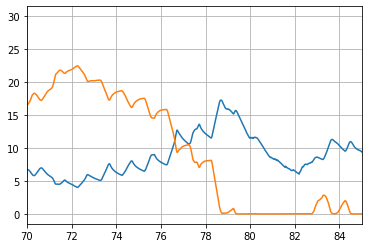

In [9]:
plt.plot(bio_time, phytoplankton)
plt.plot(bio_time, nitrate)
plt.xlim((70, 85));
plt.grid();

So bloom date is day 78, year day 77 which is Mar 18.

In [10]:
# forcing
data_clouds0 = np.loadtxt(cloud_file0)
cf_org0 = np.where(data_clouds0[:, 1] == year)[0][0]
print (data_clouds0[cf_org0, :4])
cf = np.mean(data_clouds0[:cf_org0, 4:29], axis=1)/10.
cf_org = cf.shape[0]
data_clouds1 = np.loadtxt(cloud_file)
cf_org1 = np.where(data_clouds1[:, 1] == year)[0][0]
print (data_clouds1[cf_org1, :4])
cf = np.append(cf, np.mean(data_clouds1[cf_org1:, 4:29], axis=1)/10.)
cf_time = np.arange(cf.shape[0])

winds0 = np.loadtxt(wind_file0)
wind_org0 = np.where(winds0[:, 2] == year)[0][0]
print (winds0[wind_org0, :])
winds = (winds0[:wind_org0, 4]**2 + winds0[:wind_org0, 5]**2)**1.5
wind_org = winds.shape[0]
winds1 = np.loadtxt(wind_file)
wind_org1 = np.where(winds1[:, 2] == year)[0][0]
print (winds1[wind_org1])
winds = np.append(winds, (winds1[wind_org1:, 4]**2 + winds1[wind_org1:, 5]**2)**1.5)
winds_time = (np.arange(winds.shape[0])-wind_org)/24.

[5.1442e+04 2.0200e+03 1.0000e+00 1.0000e+00]
[5.1442e+04 2.0200e+03 1.0000e+00 1.0000e+00]
[1.000000e+00 1.000000e+00 2.020000e+03 0.000000e+00 8.855064e+00
 7.747180e-01]
[1.000000e+00 1.000000e+00 2.020000e+03 0.000000e+00 8.855064e+00
 7.747180e-01]


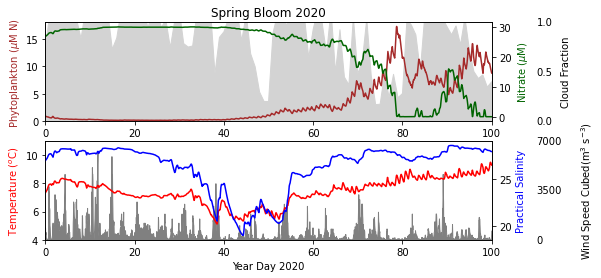

In [12]:
fig, axs = plt.subplots(2, 1, figsize=(8, 4))

tmax = 100

ymax = 18
axs[0].fill_between(cf_time-cf_org, cf*ymax, 0, color='lightgrey')
axs[0].text(tmax+15.5, ymax/2, 'Cloud Fraction', rotation=90, va='center')
axs[0].text(tmax+10, 0, '0.0', va='center')
axs[0].text(tmax+10, ymax/2, '0.5', va='center')
axs[0].text(tmax+10, ymax, '1.0', va='center')

axs[0].plot(bio_time, phytoplankton, 'brown')
axs[0].set_title('Spring Bloom ' + str(year))
axs[0].set_ylabel('Phytoplankton ($\mu$M N)', color='brown')
axs[0].set_ylim((0, ymax))

ax0b = axs[0].twinx()
ax0b.plot(bio_time, nitrate, '#006400')
ax0b.set_ylabel('Nitrate ($\mu$M)', color='#006400')

ymin = 4; ymax = 11; windsmax = 7000
axs[1].fill_between(winds_time, winds/windsmax*(ymax-ymin) + ymin, 0., color='grey')
axs[1].text(tmax+19.5, (ymax+ymin)/2, 'Wind Speed Cubed(m$^3$ s$^{-3}$)', rotation=90, va='center')
axs[1].text(tmax+10, ymin, '0', va='center')
axs[1].text(tmax+10, (ymax+ymin)/2, int(windsmax/2), va='center')
axs[1].text(tmax+10, ymax, windsmax, va='center')

axs[1].plot(phys_time, temperature, 'red')
axs[1].set_xlabel('Year Day ' + str(year))
axs[1].set_ylabel('Temperature ($^o$C)', color='red')
axs[1].set_ylim((ymin, ymax))

ax1b = axs[1].twinx()
ax1b.plot(phys_time, salinity, 'blue')
ax1b.set_ylabel('Practical Salinity', color='blue')

for ax in axs:
    ax.set_xlim((0, tmax))
fig.savefig('the2020springbloom.png')

In [28]:
year = 2020; today = 70 # (March 10)
# time series output files (chose median bloom date, 2004)
data_bio_file = directory + '/timeseries/std_bio_'+str(year)+'_bloomcast.out_0910'
data_phys_file = directory + '/timeseries/std_phys_'+str(year)+'_bloomcast.out_0910'

In [29]:
# data
data_phys = np.loadtxt(data_phys_file, skiprows=9)
salinity = data_phys[:, 10]
temperature = data_phys[:, 8]
phys_time = data_phys[:, 0]/24 + s2001
data_bio = np.loadtxt(data_bio_file, skiprows=10)
phytoplankton = data_bio[:, 8]
nitrate = data_bio[:, 2]
bio_time = data_bio[:, 0]/24 + s2001

[5.1442e+04 2.0200e+03 1.0000e+00 1.0000e+00]
[1.000000e+00 1.000000e+00 2.020000e+03 0.000000e+00 8.855064e+00
 7.747180e-01]


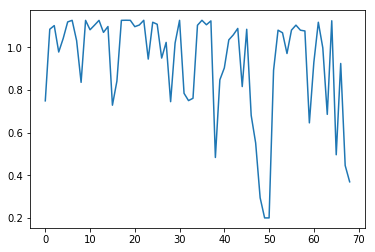

In [30]:
# forcing
data_clouds1 = np.loadtxt(cloud_file)
cf_org = np.where(data_clouds1[:, 1] == year)[0][0]
cf_org1 = cf_org
print (data_clouds1[cf_org, :4])
cf = np.mean(data_clouds1[cf_org1:, 4:29], axis=1)/10.
cf_time = np.arange(cf.shape[0]) 
plt.plot(cf_time, cf)
#plt.xlim((70, 80))

winds1 = np.loadtxt(wind_file)
wind_org = np.where(winds1[:, 2] == year)[0][0]
wind_org1 = wind_org
print (winds1[wind_org])
winds = (winds1[wind_org1:, 4]**2 + winds1[wind_org1:, 5]**2)**1.5
winds_time = (np.arange(winds.shape[0]))/24.

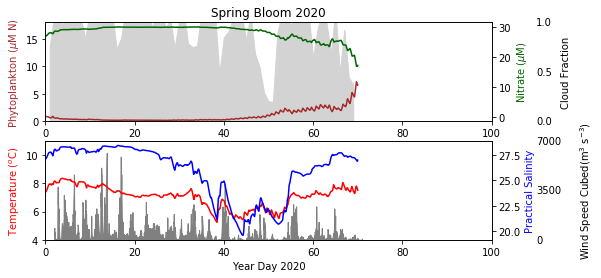

In [31]:
fig, axs = plt.subplots(2, 1, figsize=(8, 4))

tmax = 100

ymax = 18
axs[0].fill_between(cf_time+1, cf*ymax, 0, color='lightgrey')
axs[0].text(tmax+15.5, ymax/2, 'Cloud Fraction', rotation=90, va='center')
axs[0].text(tmax+10, 0, '0.0', va='center')
axs[0].text(tmax+10, ymax/2, '0.5', va='center')
axs[0].text(tmax+10, ymax, '1.0', va='center')

axs[0].plot(bio_time[bio_time < today], phytoplankton[bio_time < today], 'brown')
#axs[0].plot(bio_time[bio_time > today], phytoplankton[bio_time > today], 'brown', linestyle='dashed')

axs[0].set_title('Spring Bloom ' + str(year))
axs[0].set_ylabel('Phytoplankton ($\mu$M N)', color='brown')
axs[0].set_ylim((0, ymax))

ax0b = axs[0].twinx()
ax0b.plot(bio_time[bio_time < today], nitrate[bio_time < today], '#006400')
#ax0b.plot(bio_time[bio_time > today], nitrate[bio_time > today], '#006400', linestyle='dashed')
ax0b.set_ylabel('Nitrate ($\mu$M)', color='#006400')

ymin = 4; ymax = 11; windsmax = 7000
#"Wind Speed Cubed (m^3 s^{-3})"
axs[1].fill_between(winds_time+2, winds/windsmax*(ymax-ymin) + ymin, 0., color='grey')
axs[1].text(tmax+19.5, (ymax+ymin)/2, 'Wind Speed Cubed(m$^3$ s$^{-3}$)', rotation=90, va='center')
axs[1].text(tmax+10, ymin, '0', va='center')
axs[1].text(tmax+10, (ymax+ymin)/2, int(windsmax/2), va='center')
axs[1].text(tmax+10, ymax, windsmax, va='center')

axs[1].plot(phys_time[phys_time < today], temperature[phys_time  < today], 'red')
#axs[1].plot(phys_time[phys_time > today], temperature[phys_time  > today], 'red', linestyle='dashed')

axs[1].set_xlabel('Year Day ' + str(year))
axs[1].set_ylabel('Temperature ($^o$C)', color='red')
axs[1].set_ylim((ymin, ymax))

ax1b = axs[1].twinx()
ax1b.plot(phys_time[phys_time < today], salinity[phys_time < today], 'blue')
#ax1b.plot(phys_time[phys_time > today], salinity[phys_time > today], 'blue', linestyle='dashed')

ax1b.set_ylabel('Practical Salinity', color='blue')

for ax in axs:
    ax.set_xlim((0, tmax))

In [ ]:
Need to work on time between weather etc